# Assemble Monocam Images
=============================================

- Creation : Tuesday 2016 June 14th
- Author Sylvie Dagoret-Campagne 
- affiliation : LAL/IN2P3/CNRS

Raw Spectrum of HD158485


## 1) Import package

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [2]:
from scipy import stats 
from scipy import ndimage
import os
from datetime import datetime, timedelta

In [126]:
import libMonocamBaseImages           # my tool library written to do that CCD reduction

In [3]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-06-22 20:29:37.905929
fits date format for the analysis :  2016-06-22T20:29:37


## 2) Configuration of the detector

In [4]:
NB_OF_CHAN_AMPL=16    # 16 images in each of the fits file

## 3) Configuration of the input file

- HD158485_grat_science.fits
- HD159222_grat_science.fits
- HD163466_grat_science.fits


In [22]:
object_name='HD158485_grat_1'
#object_name='HD159222_grat'
#object_name='HD163466_grat'

In [34]:
path='./HD158485_grat'
basefilename='AssScImHD158485_grat_1.fits' # check master bias
filename=os.path.join(path,basefilename)
outputfigfilename='ScienceImageAssemblerInput_img.pdf'
outputfigfilename2='ReorderedImage_'+object_name+'_img.pdf'
outputfigfilename3='SingleImage_'+object_name+'_img.pdf'
outputfigfilename4='RotatedImage_'+object_name+'_img.pdf'
outputfigfilename5='SpectrumRegion_'+object_name+'_img.pdf'
outputfigfilename6='SpectrumHisto_'+object_name+'_img.pdf'
outputfigfilename7='SpectrumLogHisto_'+object_name+'_img.pdf'

## 4) Read the images

In [24]:
allimages = []
ccd_chan = ccdproc.CCDData.read(filename, hdu=0,unit='adu') 
allimages.append(ccd_chan)

## 5) Shows the images

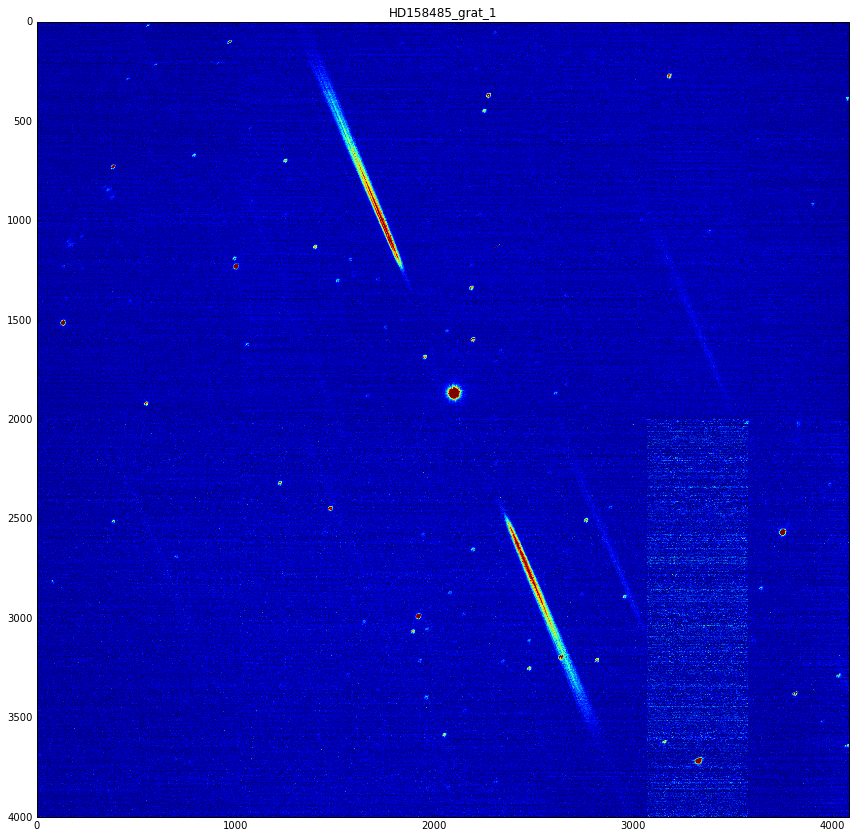

In [25]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(ccd_chan,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.savefig(outputfigfilename3)

## 8.) Image rotation and spectrum region selection

In [26]:
rotated_image=ndimage.interpolation.rotate(ccd_chan,67.5)

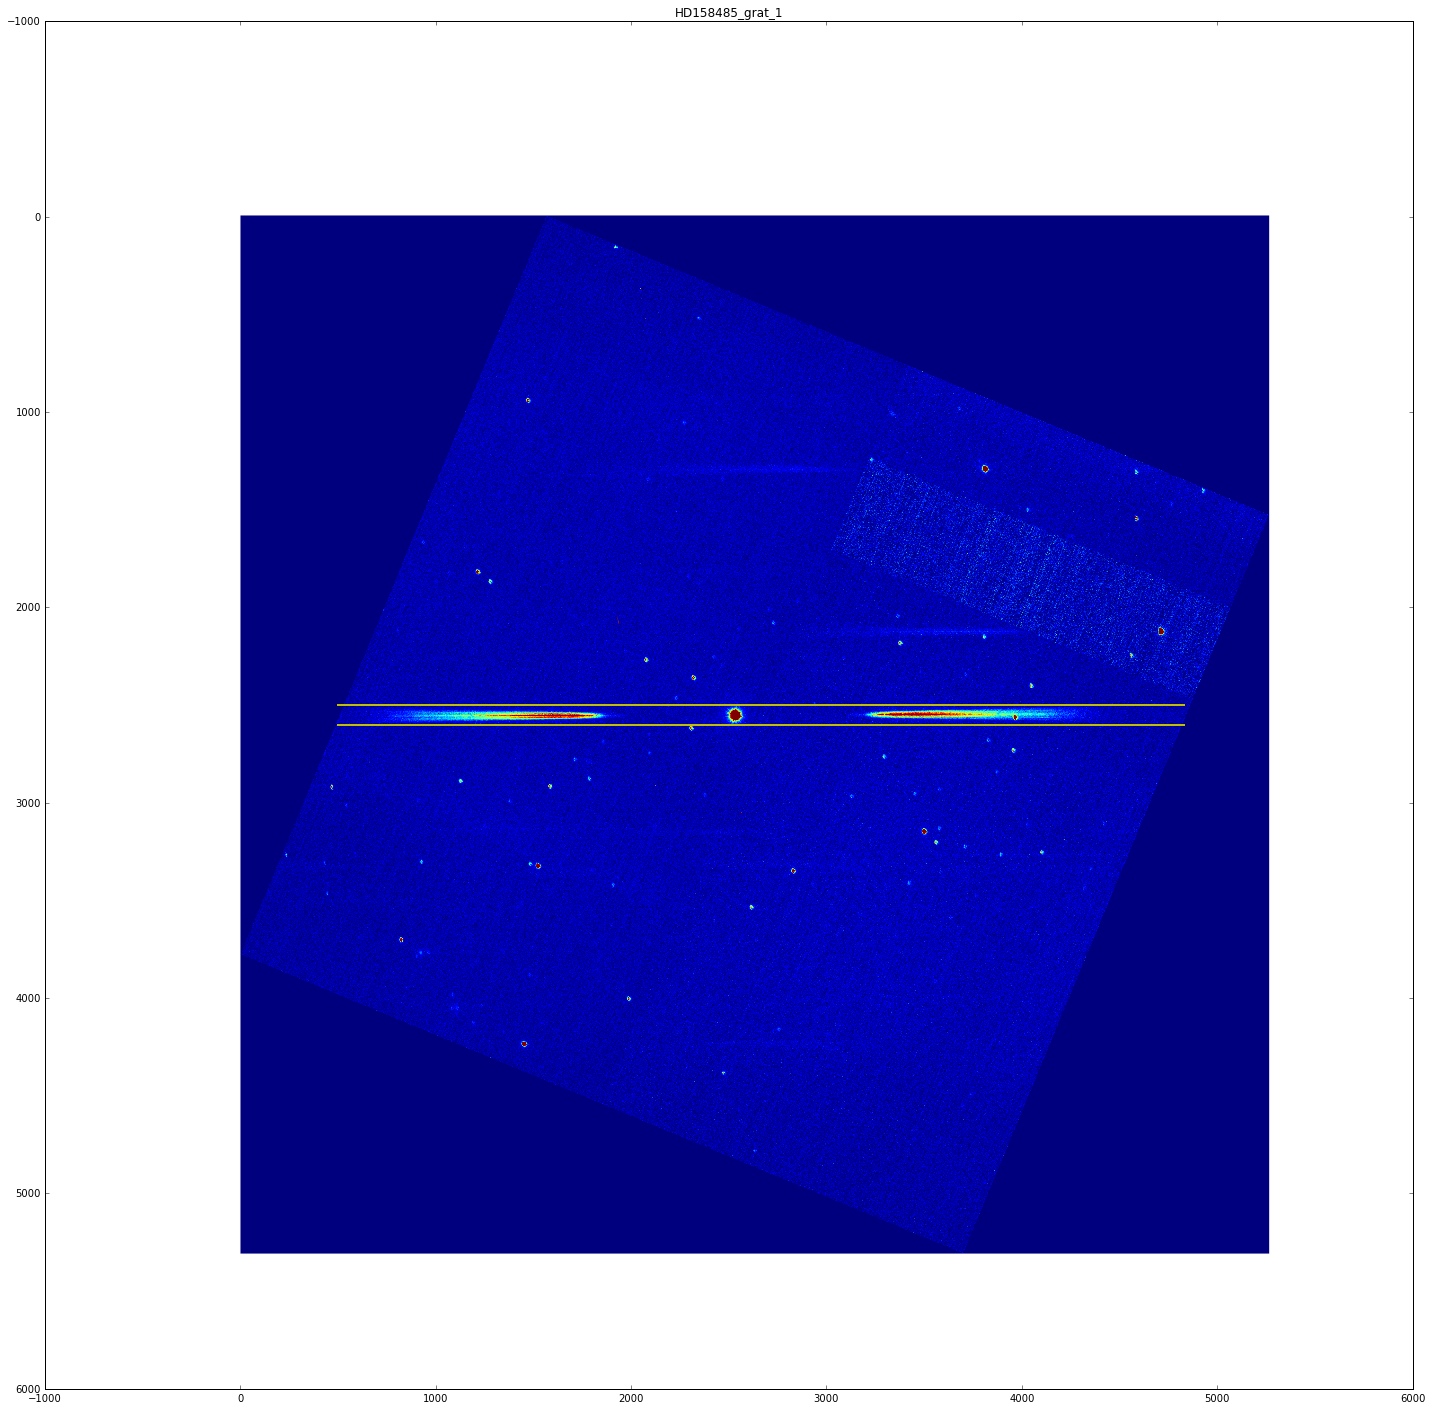

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(rotated_image,vmin=0,vmax=50.)
ax.plot([500, 4830], [2500, 2500], color='y', linestyle='-', linewidth=2)
ax.plot([500, 4830], [2600, 2600], color='y', linestyle='-', linewidth=2)
plt.title(object_name)
plt.tight_layout()
plt.savefig(outputfigfilename4)

## 9.) Extraction of the spectrum from the image

In [28]:
SpectrumRegion=rotated_image[2500:2600,480:4830]

In [29]:
SpectrumRegion.shape

(100, 4350)

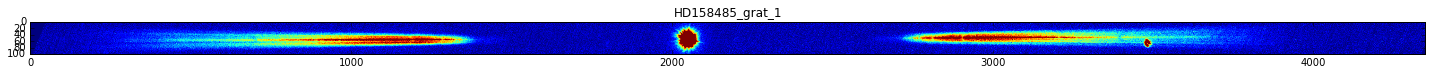

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(SpectrumRegion,vmin=0,vmax=50.)
plt.title(object_name)
plt.tight_layout()
plt.savefig(outputfigfilename5)

In [31]:
spectrum=np.sum(SpectrumRegion,axis=0)

In [32]:
spectrum.shape

(4350,)

## 10.)  Plot the spectrum

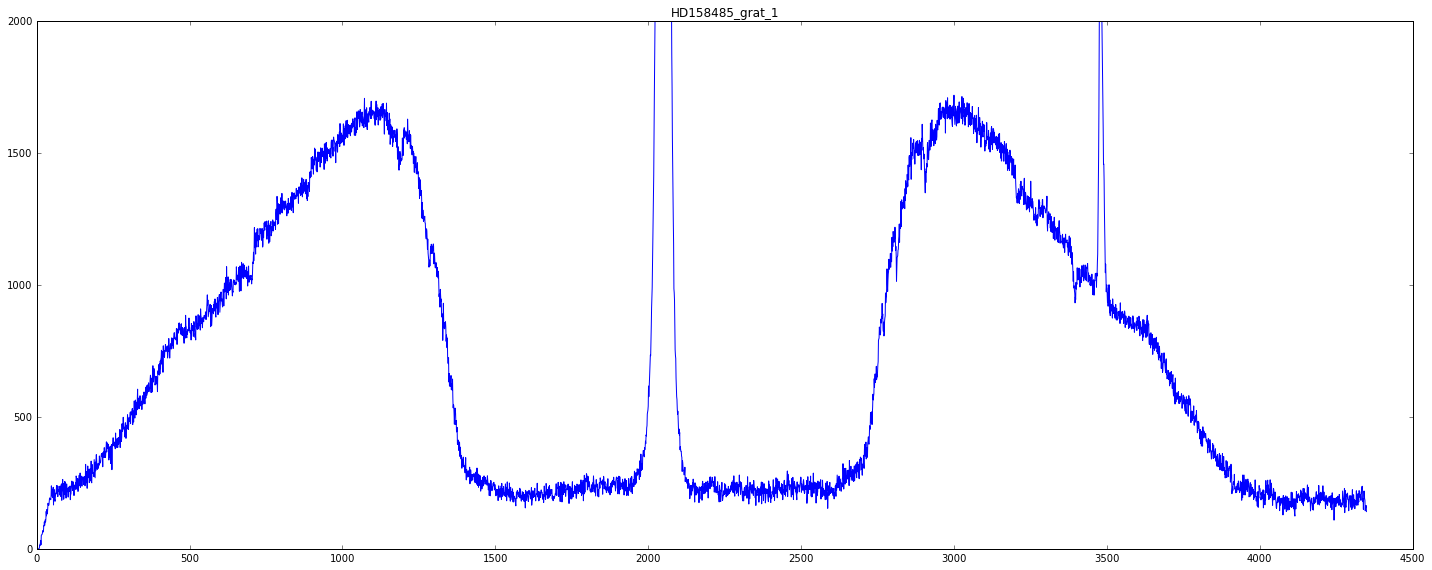

In [39]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(spectrum)
plt.ylim(0.,2000.)
plt.title(object_name)
plt.tight_layout()
plt.savefig(outputfigfilename6)

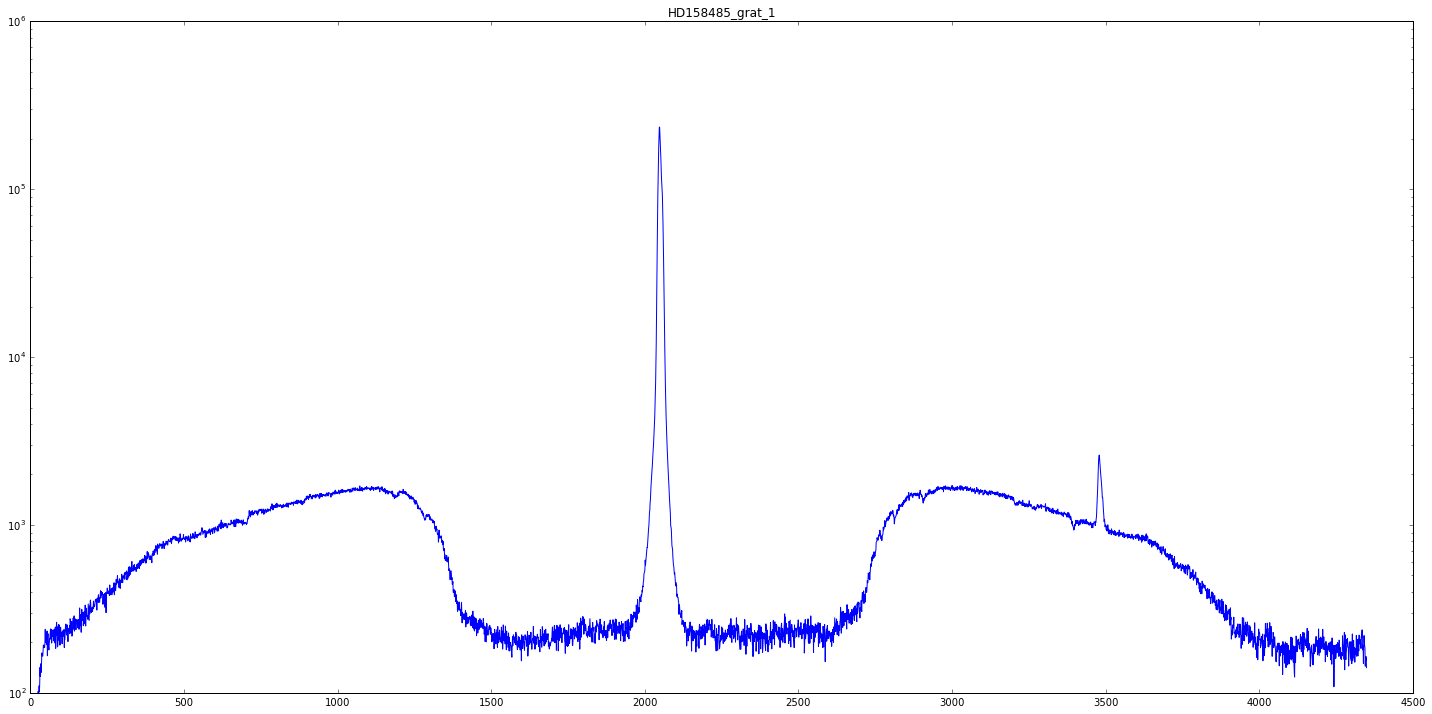

In [37]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.semilogy(spectrum)
plt.ylim(100.,1000000.)
plt.title(object_name)
plt.tight_layout()
plt.savefig(outputfigfilename7)